In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [16]:
df_aug = pd.read_csv('plant_LSTM_eval - Augustus_all.csv')
df_nn = pd.read_csv('plant_LSTM_eval - TSTA8.csv')
# df_nn = pd.read_csv('plant_LSTM_eval - nh7y2_11.csv')
df_meta = pd.read_csv('metadata_plants.csv')

genomes = set(df_aug['genome']).intersection(set(df_nn['genome']))

df_aug = df_aug[df_aug['genome'].isin(genomes)].sort_values('genome').reset_index(drop=True)
df_nn = df_nn[df_nn['genome'].isin(genomes)].sort_values('genome').reset_index(drop=True)
df_meta = df_meta[df_meta['species'].isin(genomes)].sort_values('species').reset_index(drop=True)

df_aug = df_aug.drop(columns=['acc_overall', 'f1_ig', 'f1_utr', 'f1_exon', 'f1_intron', 'legacy_f1_cds','f1_genic'])

# add nn values and metadata to aug df
df_aug['NN'] = df_nn['sub_genic']
df_aug['total_len'] = df_meta['total_len']
df_plants = df_aug.rename(columns={'sub_genic': 'AUG', 'genome': 'species'})

# remove training genomes
df_plants = df_plants[~df_plants['species'].isin(['Athaliana','Bdistachyon','Creinhardtii','Gmax','Mguttatus','Mpolymorpha',
                                                  'Ptrichocarpa','Sitalica'])].reset_index(drop=True)


In [17]:
df_plants

,species,AUG,NN,total_len
0,Acomosus,0.6584,0.7524,381905120
1,Ahypochondriacus,0.6885,0.8563,403889442
2,Aofficinalis,0.7571,0.6907,1187539004
3,Atrichopoda,0.8300,0.7691,706332648
4,Boleraceacapitata,0.9077,0.8977,385006588
5,Carietinum,0.8988,0.8714,532289632
6,Cclementina,0.7472,0.8941,301386998
7,Cgrandiflora,0.9049,0.9269,105346052
8,Crubella,0.8787,0.9251,134834574
9,Csinensis,0.7942,0.8871,319231331


(0.0, 1.0)

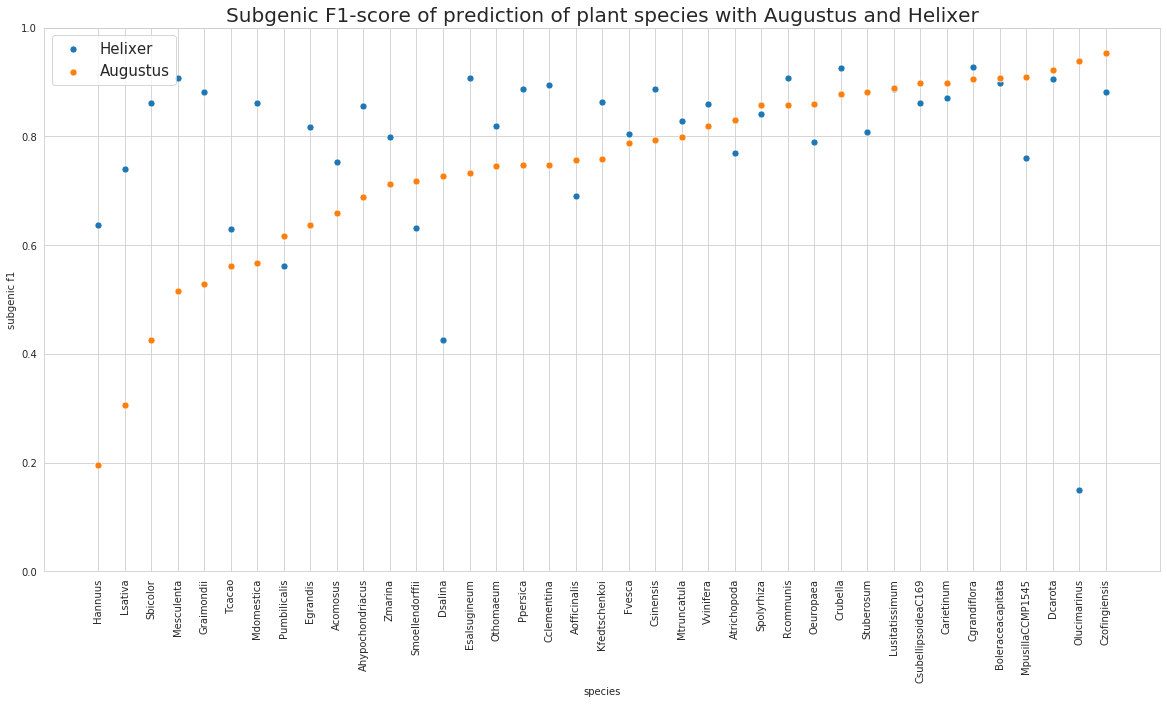

In [18]:
sns.set_style("whitegrid")
f, axes = plt.subplots(1, 1,sharey=True, figsize=(20,10))
score_plot = sns.scatterplot(x='species',y='NN',data=df_plants.sort_values(by="AUG"), s=50)
score_plot = sns.scatterplot(x='species',y='AUG',data=df_plants.sort_values(by="AUG"), s=50)
plt.title("Subgenic F1-score of prediction of plant species with Augustus and Helixer",fontsize=20)
plt.xlabel("species")
plt.ylabel("subgenic f1")
plt.legend(["Helixer","Augustus"],fontsize=15)
plt.xticks(rotation=90);
plt.ylim((0.0, 1.0))

(0.0, 1.0)

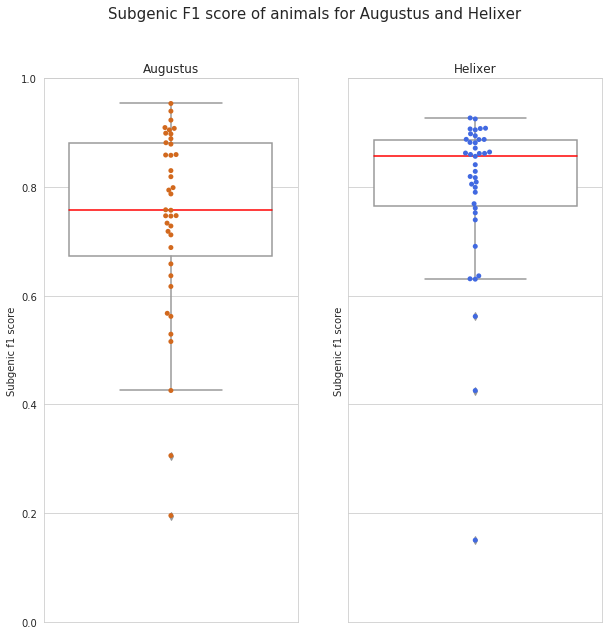

In [19]:
sns.set_style("whitegrid")
f, axes = plt.subplots(1, 2,sharey=True, figsize=(10,10))

sns.boxplot(y=df_plants["AUG"],medianprops={'color':'red'},ax=axes[0],color="white")
sns.swarmplot(y="AUG", data=df_plants,ax=axes[0],color="chocolate")
axes[0].set_title('Augustus')
axes[0].set_ylabel("Subgenic f1 score")

sns.boxplot(y=df_plants["NN"],medianprops={'color':'red'},ax=axes[1],color="white")
sns.swarmplot(y="NN", data=df_plants,ax=axes[1],color="royalblue")
axes[1].set_title('Helixer')
axes[1].set_ylabel("Subgenic f1 score")

plt.suptitle("Subgenic F1 score of animals for Augustus and Helixer",fontsize=15)
plt.ylim((0.0, 1.0))

(0.0, 1.0)

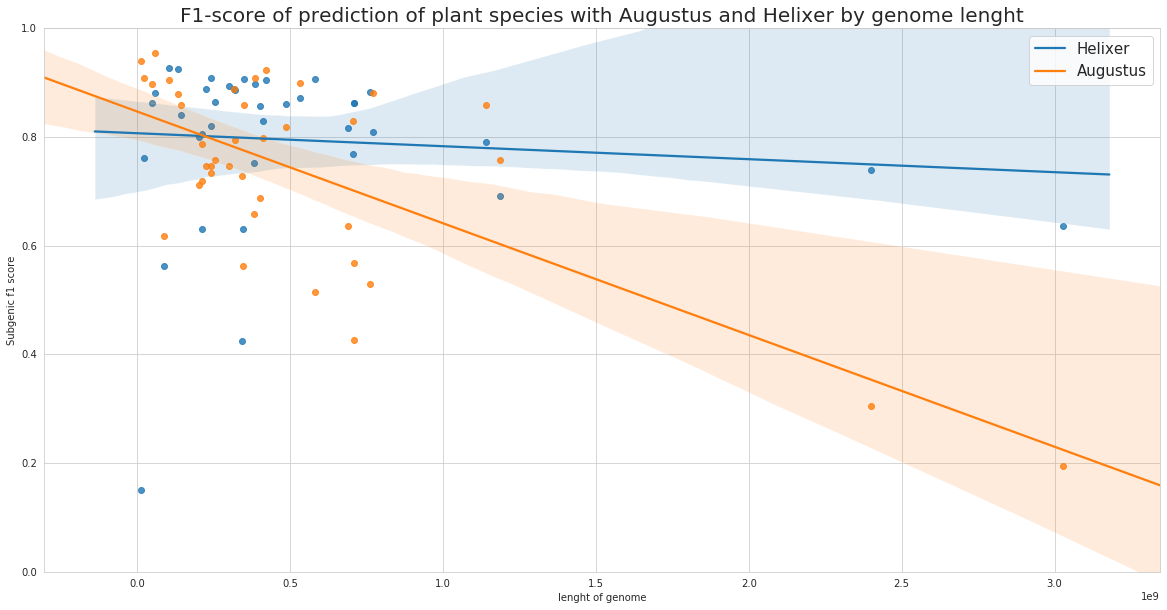

In [20]:
sns.set_style("whitegrid")
f, axes = plt.subplots(1, 1,sharey=True, figsize=(20,10))
animal_score_plot = sns.regplot(x='total_len',y='NN',data=df_plants.sort_values(by="total_len"))
animal_score_plot = sns.regplot(x='total_len',y='AUG',data=df_plants.sort_values(by="total_len"))
plt.title("F1-score of prediction of plant species with Augustus and Helixer by genome lenght",fontsize=20)
plt.xlabel("lenght of genome")
plt.ylabel("Subgenic f1 score")
plt.legend(["Helixer","Augustus"],fontsize=15);
plt.ylim((0.0, 1.0))